<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a href="https://agrum.gitlab.io/pages/pyagrum.html" target="blank"><img src="https://agrum.gitlab.io/images/pyAgrum.png" align="right" style="height:75px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a><br/>
Author: <b>Aymen Merrouche</b> and Pierre-Henri Wuillemin.

<font size="+3" color="GREEN">**The Effect of Education and Experience on Salary**</font>
#### This notebook follows the example from "The Book Of Why" (Pearl, 2018) chapter 8 page 251. 

## Counterfactuals

In [1]:
from IPython.display import display, Math, Latex,HTML

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.causal as csl
import pyAgrum.causal.notebook as cslnb
import os
import math
import numpy as np
import scipy.stats

In this example we are interested in the effect of experience and education on the salary of an employee, we are in possession of the following data:


<table>
    <tr>
        <th>Employé</th> <th>EX(u)</th> <th>ED(u)</th> <th> $S_{0}(u)$</th> <th> $S_{1}(u)$</th> <th>$S_{2}(u)$</th>
    </tr>
    <tr>
        <td>Alice</td> <td>8</td> <td>0</td> <td>86,000</td> <td>?</td> <td>?</td> 
    </tr>
    <tr>
        <td>Bert</td> <td>9</td> <td>1</td> <td>?</td> <td>92,500</td> <td>?</td> 
    </tr>
    <tr>
        <td>Caroline</td> <td>9</td> <td>2</td> <td>?</td> <td>?</td> <td>97,000</td> 
    </tr>
    <tr>
        <td>David</td> <td>8</td> <td>1</td> <td>?</td> <td>91,000</td> <td>?</td>
    </tr>
    <tr>
        <td>Ernest</td> <td>12</td> <td>1</td> <td>?</td> <td>100,000</td> <td>?</td> 
    </tr>
    <tr>
        <td>Frances</td> <td>13</td> <td>0</td> <td>97,000</td> <td>?</td> <td>?</td> 
    </tr>
    <tr>
        <td>etc</td> <td> </td> <td> </td> <td> </td> <td> </td> <td> </td> 
    </tr>
</table>


* $EX(u)$ : years of experience of employee $u$. [0,20]
* $ED(u)$ : Level of education of employee $u$ (0:high school degree (low), 1:college degree (medium), 2:graduate degree (high)) [0,2]
* $S_{i}(u)$ [65k,150k] :
   * salary (observable) of employee $u$ if $i = ED(u)$, 
   * Potential outcome (unobservable) if $i \not = ED(u)$, salary of employee $u$ if he had a level of education of $i$.  

> We are left with the previous data and we want to answer the counterfactual question <b> What would Alice's salary be if she attended college ? </b>(i.e. $S_{1}(Alice)$)

### We create the causal diagram

As in `BoW-c8p251-educationAndExperience.ipynb`, we create a BN for this problem. However, here we want to take into account some imprecisions in the equations :
$$Ex = 10 -4 \times Ed + Ux$$
$$S = 65 + 2.5 \times Ex + 5 \times Ed + Us$$

In [2]:
# Model for the imprecisions in the equations
x_min = 0.0
x_max = 4.0

mean = 2.0
std = 0.65

x = np.linspace(x_min, x_max, 5)
y = scipy.stats.norm.pdf(x,mean,std)
print("We'll use the following distribution to model imprecision \n",y)
imprecision=list(y)

We'll use the following distribution to model imprecision 
 [0.00539715 0.18794845 0.61375735 0.18794845 0.00539715]


In [3]:
edex = gum.fastBN("Ux[-2,10]->experience[0,20]<-education{low|medium|high}->salary[65,150]<-Us[0,25];experience->salary")
# no prior information about the individual (datapoint)
edex.cpt("Us").fillWith(1).normalize()
edex.cpt("Ux").fillWith(1).normalize()
# education level(supposed)
edex.cpt("education")[:] = [0.4, 0.4, 0.2]
edex.cpt("experience").fillWithFunction("10-4*education+Ux",noise=imprecision)
edex.cpt("salary").fillWithFunction("round(65+2.5*experience+5*education+Us)",noise=imprecision)

edex.cpt("experience")

(gum::Potential<double>@0x7fc501c9dab0) <experience:0|Ux:-2|education:low> :: 0 /<experience:1|Ux:-2|education:low> :: 0 /<experience:2|Ux:-2|education:low> :: 0 /<experience:3|Ux:-2|education:low> :: 0 /<experience:4|Ux:-2|education:low> :: 0 /<experience:5|Ux:-2|education:low> :: 0 /<experience:6|Ux:-2|education:low> :: 0.00539473 /<experience:7|Ux:-2|education:low> :: 0.187864 /<experience:8|Ux:-2|education:low> :: 0.613482 /<experience:9|Ux:-2|education:low> :: 0.187864 /<experience:10|Ux:-2|education:low> :: 0.00539473 /<experience:11|Ux:-2|education:low> :: 0 /<experience:12|Ux:-2|education:low> :: 0 /<experience:13|Ux:-2|education:low> :: 0 /<experience:14|Ux:-2|education:low> :: 0 /<experience:15|Ux:-2|education:low> :: 0 /<experience:16|Ux:-2|education:low> :: 0 /<experience:17|Ux:-2|education:low> :: 0 /<experience:18|Ux:-2|education:low> :: 0 /<experience:19|Ux:-2|education:low> :: 0 /<experience:20|Ux:-2|education:low> :: 0 /<experience:0|Ux:-1|education:low> :: 0 /<experience:1|Ux:-1|education:low> :: 0 /<experience:2|Ux:-1|education:low> :: 0 /<experience:3|Ux:-1|education:low> :: 0 /<experience:4|Ux:-1|education:low> :: 0 /<experience:5|Ux:-1|education:low> :: 0 /<experience:6|Ux:-1|education:low> :: 0 /<experience:7|Ux:-1|education:low> :: 0.00539473 /<experience:8|Ux:-1|education:low> :: 0.187864 /<experience:9|Ux:-1|education:low> :: 0.613482 /<experience:10|Ux:-1|education:low> :: 0.187864 /<experience:11|Ux:-1|education:low> :: 0.00539473 /<experience:12|Ux:-1|education:low> :: 0 /<experience:13|Ux:-1|education:low> :: 0 /<experience:14|Ux:-1|education:low> :: 0 /<experience:15|Ux:-1|education:low> :: 0 /<experience:16|Ux:-1|education:low> :: 0 /<experience:17|Ux:-1|education:low> :: 0 /<experience:18|Ux:-1|education:low> :: 0 /<experience:19|Ux:-1|education:low> :: 0 /<experience:20|Ux:-1|education:low> :: 0 /<experience:0|Ux:0|education:low> :: 0 /<experience:1|Ux:0|education:low> :: 0 /<experience:2|Ux:0|education:low> :: 0 /<experience:3|Ux:0|education:low> :: 0 /<experience:4|Ux:0|education:low> :: 0 /<experience:5|Ux:0|education:low> :: 0 /<experience:6|Ux:0|education:low> :: 0 /<experience:7|Ux:0|education:low> :: 0 /<experience:8|Ux:0|education:low> :: 0.00539473 /<experience:9|Ux:0|education:low> :: 0.187864 /<experience:10|Ux:0|education:low> :: 0.613482 /<experience:11|Ux:0|education:low> :: 0.187864 /<experience:12|Ux:0|education:low> :: 0.00539473 /<experience:13|Ux:0|education:low> :: 0 /<experience:14|Ux:0|education:low> :: 0 /<experience:15|Ux:0|education:low> :: 0 /<experience:16|Ux:0|education:low> :: 0 /<experience:17|Ux:0|education:low> :: 0 /<experience:18|Ux:0|education:low> :: 0 /<experience:19|Ux:0|education:low> :: 0 /<experience:20|Ux:0|education:low> :: 0 /<experience:0|Ux:1|education:low> :: 0 /<experience:1|Ux:1|education:low> :: 0 /<experience:2|Ux:1|education:low> :: 0 /<experience:3|Ux:1|education:low> :: 0 /<experience:4|Ux:1|education:low> :: 0 /<experience:5|Ux:1|education:low> :: 0 /<experience:6|Ux:1|education:low> :: 0 /<experience:7|Ux:1|education:low> :: 0 /<experience:8|Ux:1|education:low> :: 0 /<experience:9|Ux:1|education:low> :: 0.00539473 /<experience:10|Ux:1|education:low> :: 0.187864 /<experience:11|Ux:1|education:low> :: 0.613482 /<experience:12|Ux:1|education:low> :: 0.187864 /<experience:13|Ux:1|education:low> :: 0.00539473 /<experience:14|Ux:1|education:low> :: 0 /<experience:15|Ux:1|education:low> :: 0 /<experience:16|Ux:1|education:low> :: 0 /<experience:17|Ux:1|education:low> :: 0 /<experience:18|Ux:1|education:low> :: 0 /<experience:19|Ux:1|education:low> :: 0 /<experience:20|Ux:1|education:low> :: 0 /<experience:0|Ux:2|education:low> :: 0 /<experience:1|Ux:2|education:low> :: 0 /<experience:2|Ux:2|education:low> :: 0 /<experience:3|Ux:2|education:low> :: 0 /<experience:4|Ux:2|education:low> :: 0 /<experience:5|Ux:2|education:low> :: 0 /<experience:6|Ux:2|education:low> :: 0 /<experience:7|Ux:2|education:low> :: 0 /<experience:8|Ux:2|education:low> :: 0

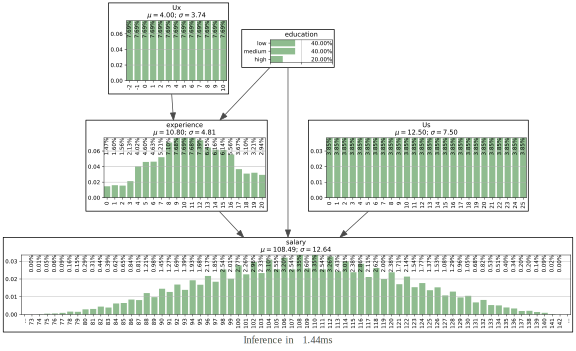

In [4]:
gnb.showInference(edex)

# Counterfactual in pyAgrum

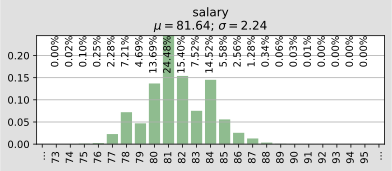

In [5]:
pot=csl.counterfactual(cm = csl.CausalModel(edex), 
                       profile = {'experience':8, 'education': "low", 'salary' : "86"},
                       whatif={"education"},
                       on={"salary"}, 
                       values = {"education" : "medium"})
gnb.showProba(pot)

### If we omit values:

We get every potential outcome :

In [6]:
csl.counterfactual(cm = csl.CausalModel(edex), 
                   profile = {'experience':8, 'education': "low", 'salary' : "86"},
                   whatif={"education"},
                   on={"salary"}).putFirst("salary")

(gum::Potential<double>@0x7fc4b1febf40) <salary:65|education:low> :: 0 /<salary:66|education:low> :: 0 /<salary:67|education:low> :: 0 /<salary:68|education:low> :: 0 /<salary:69|education:low> :: 0 /<salary:70|education:low> :: 0 /<salary:71|education:low> :: 0 /<salary:72|education:low> :: 0 /<salary:73|education:low> :: 0 /<salary:74|education:low> :: 0 /<salary:75|education:low> :: 0 /<salary:76|education:low> :: 0 /<salary:77|education:low> :: 0 /<salary:78|education:low> :: 4.18024e-06 /<salary:79|education:low> :: 0.000159222 /<salary:80|education:low> :: 0.00110177 /<salary:81|education:low> :: 0.00695751 /<salary:82|education:low> :: 0.0182852 /<salary:83|education:low> :: 0.0276204 /<salary:84|education:low> :: 0.091199 /<salary:85|education:low> :: 0.140745 /<salary:86|education:low> :: 0.231683 /<salary:87|education:low> :: 0.162888 /<salary:88|education:low> :: 0.163708 /<salary:89|education:low> :: 0.056969 /<salary:90|education:low> :: 0.0475667 /<salary:91|education:low> :: 0.0339122 /<salary:92|education:low> :: 0.0127489 /<salary:93|education:low> :: 0.00265873 /<salary:94|education:low> :: 0.00135179 /<salary:95|education:low> :: 0.000392775 /<salary:96|education:low> :: 3.54932e-05 /<salary:97|education:low> :: 1.09942e-05 /<salary:98|education:low> :: 1.5937e-06 /<salary:99|education:low> :: 7.35189e-08 /<salary:100|education:low> :: 1.05559e-09 /<salary:101|education:low> :: 0 /<salary:102|education:low> :: 0 /<salary:103|education:low> :: 0 /<salary:104|education:low> :: 0 /<salary:105|education:low> :: 0 /<salary:106|education:low> :: 0 /<salary:107|education:low> :: 0 /<salary:108|education:low> :: 0 /<salary:109|education:low> :: 0 /<salary:110|education:low> :: 0 /<salary:111|education:low> :: 0 /<salary:112|education:low> :: 0 /<salary:113|education:low> :: 0 /<salary:114|education:low> :: 0 /<salary:115|education:low> :: 0 /<salary:116|education:low> :: 0 /<salary:117|education:low> :: 0 /<salary:118|education:low> :: 0 /<salary:119|education:low> :: 0 /<salary:120|education:low> :: 0 /<salary:121|education:low> :: 0 /<salary:122|education:low> :: 0 /<salary:123|education:low> :: 0 /<salary:124|education:low> :: 0 /<salary:125|education:low> :: 0 /<salary:126|education:low> :: 0 /<salary:127|education:low> :: 0 /<salary:128|education:low> :: 0 /<salary:129|education:low> :: 0 /<salary:130|education:low> :: 0 /<salary:131|education:low> :: 0 /<salary:132|education:low> :: 0 /<salary:133|education:low> :: 0 /<salary:134|education:low> :: 0 /<salary:135|education:low> :: 0 /<salary:136|education:low> :: 0 /<salary:137|education:low> :: 0 /<salary:138|education:low> :: 0 /<salary:139|education:low> :: 0 /<salary:140|education:low> :: 0 /<salary:141|education:low> :: 0 /<salary:142|education:low> :: 0 /<salary:143|education:low> :: 0 /<salary:144|education:low> :: 0 /<salary:145|education:low> :: 0 /<salary:146|education:low> :: 0 /<salary:147|education:low> :: 0 /<salary:148|education:low> :: 0 /<salary:149|education:low> :: 0 /<salary:150|education:low> :: 0 /<salary:65|education:medium> :: 0 /<salary:66|education:medium> :: 0 /<salary:67|education:medium> :: 0 /<salary:68|education:medium> :: 0 /<salary:69|education:medium> :: 0 /<salary:70|education:medium> :: 0 /<salary:71|education:medium> :: 0 /<salary:72|education:medium> :: 0 /<salary:73|education:medium> :: 4.18024e-06 /<salary:74|education:medium> :: 0.000159222 /<salary:75|education:medium> :: 0.000954923 /<salary:76|education:medium> :: 0.00247002 /<salary:77|education:medium> :: 0.0227727 /<salary:78|education:medium> :: 0.0720776 /<salary:79|education:medium> :: 0.0468885 /<salary:80|education:medium> :: 0.136882 /<salary:81|education:medium> :: 0.244774 /<salary:82|education:medium> :: 0.153956 /<salary:83|education:medium> :: 0.0751771 /<salary:84|education:medium> :: 0.145204 /<salary:85|education:medium> :: 0.0558375 /<salary:86|education:medium> :: 0.0255606 /<salary:87|education:medium> :: 0.0128187 /<salary:88|education:medium> :: 

### What would Alice's salary be if she had attended college and had 8 years of experience ?

In [7]:
pot=csl.counterfactual(cm = csl.CausalModel(edex), 
                       profile = {'experience':8, 'education': 'low', 'salary' : '86'},
                       whatif={"education", "experience"},
                       on={"salary"}, 
                       values = {"education" : 'medium', "experience" : 8})

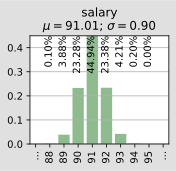

In [8]:
gnb.showProba(pot)

### if she attended college and had 8 years of experience Alice's salary would be 91k !

>In the previous query, Alice's salary if she attended college was lower than her actual salary, that's because in the counterfactual world where she attended college she had less time to work hence her diminished salary. 

>In this query, Alice's counterfactual salary was higher than her actual salary (+5k corresponding to one level of education), that's because in the counterfactual world Alice attended college and still had time to work 8 years, so her salary went up. 

### if she had more experience :
still no answer to this question

In [9]:
pot=csl.counterfactual(cm = csl.CausalModel(edex), 
                       profile = {'experience':8, 'education': 'low', 'salary' : '86'},
                       whatif={"experience"},
                       on={"salary"}, 
                       values = {"experience" : 12})

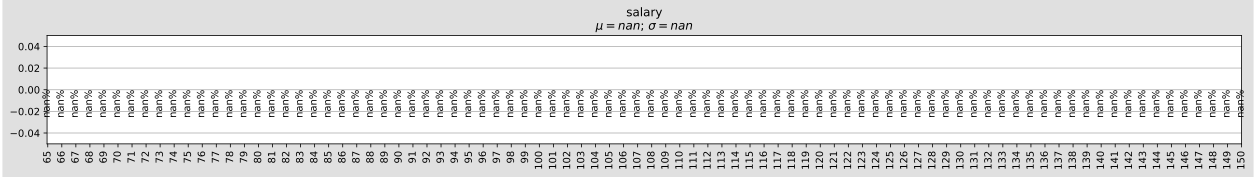

In [10]:
gnb.showProba(pot)

### Latent variable between $U_x$ and $experience$ :

In [11]:
edexModeleWithOne = csl.CausalModel(edex,[("u1", ["Ux","experience"])],False) #(<latent variable name>, <list of affected variables’ ids>).
edexModeleWithOne

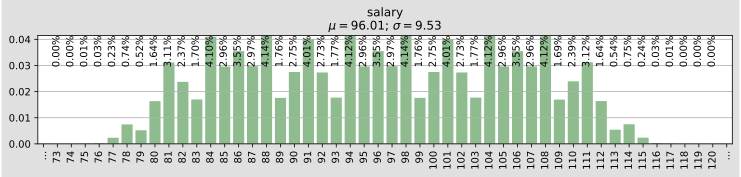

In [12]:
pot = csl.counterfactual(cm = edexModeleWithOne, 
                         profile = {'experience':8, 'education': "low", 'salary' : "86"},
                         whatif={"education"},
                         on={"salary"}, 
                         values = {"education" : "medium"})
gnb.showProba(pot)

> With one latent variable between $U_x$ and $experience$, we get \$96k corresponding to one education level (we don't need to worry about experience any more.)